# STATS  MINI PROJECT

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats

1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

In [2]:
#importing datasets
data=pd.read_csv('fifa_stats.csv')
data.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
data_num=data.select_dtypes(include=np.number)

In [4]:
for i in data_num.columns:
    iqr=data_num[i].quantile(0.75)-data_num[i].quantile(0.25)
    ##print("inter_quartile_range is")
    upper_bound=data_num[i].quantile(0.75)+1.5*iqr
    lower_bound=data_num[i].quantile(0.25)-1.5*iqr
    ##print("ub is:",upper_bound)
    ##print("lb is:",lower_bound)
    print("the number of outliers in",i,"is",len(data_num[((data_num[i]>upper_bound) |(data_num[i]<lower_bound))]))

the number of outliers in Age is 4
the number of outliers in Overall_rating is 55
the number of outliers in Potential is 8
the number of outliers in International Reputation is 57
the number of outliers in Weak Foot is 10
the number of outliers in Skill Moves is 0
the number of outliers in Jersey Number is 63
the number of outliers in Height is 0
the number of outliers in Weight is 8


In [5]:
for i in data_num.columns:
    iqr=data_num[i].quantile(0.75)-data_num[i].quantile(0.25)
    upper_bound=data_num[i].quantile(0.75)+1.5*iqr
    lower_bound=data_num[i].quantile(0.25)-1.5*iqr
    uc=data_num[i].quantile(0.99)
    lc=data_num[i].quantile(0.1)
    for j in data_num[i].index:
        if data_num.loc[j,i]>upper_bound:    ## use to remove outliers
            data_num.loc[j,i]=uc
        if data_num.loc[j,i]<lower_bound:
            data_num.loc[j,i]=lc
            

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


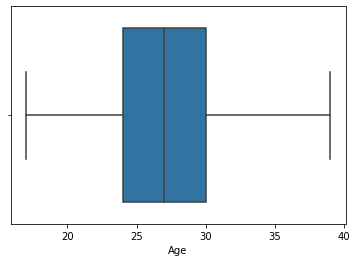

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


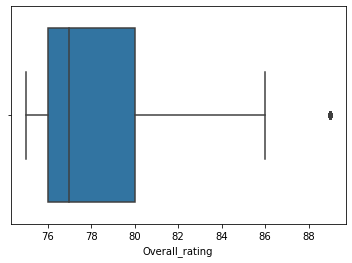

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


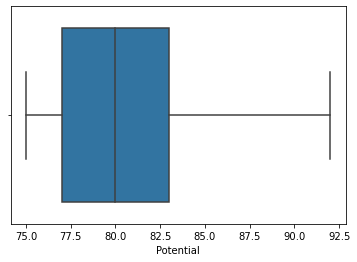

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


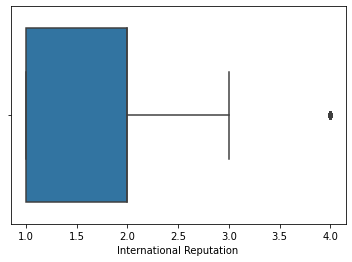

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


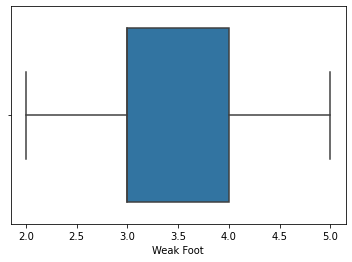

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


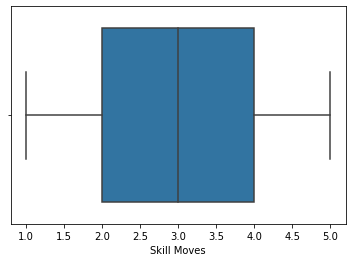

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


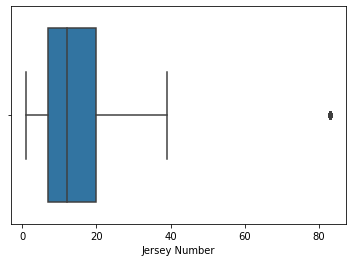

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


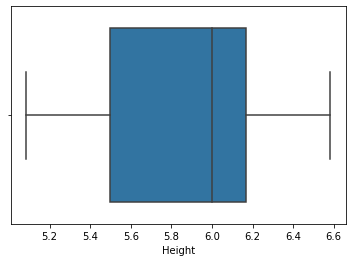

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


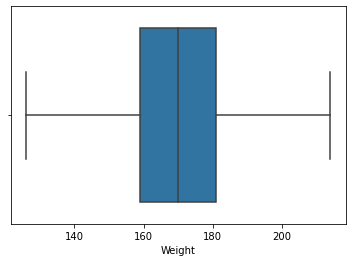

In [6]:
for i in data_num.columns:
    sb.boxplot(data_num[i])
    plt.show()

In [7]:
data=data.dropna()
data.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Preferred Foot']=le.fit_transform(df1['Preferred Foot'])

NameError: name 'df1' is not defined

In [ ]:
df1['Preferred Foot']

In [ ]:
df1.head()

In [ ]:
df1.columns

a)Assuming age as population, perform the central limit theorem with sample size of 200.
Find the standard error and the mean of sampling distribution. 
Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size



27.215547703180214

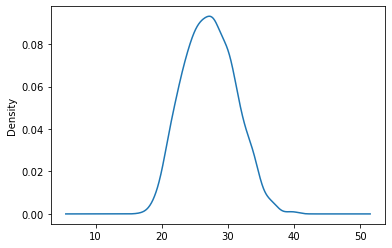

In [10]:
data['Age'].plot(kind='kde')
data['Age'].mean()

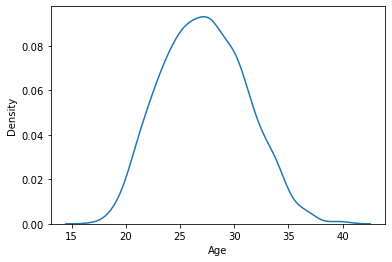

In [12]:
pop=data['Age']
sb.kdeplot(pop)
plt.show()                                           

In [13]:
sample_size=200
no_of_sample=len(data['Age'])
sample_mean_list=[]
for i in range(no_of_sample):
    sample=np.random.choice(pop,size=sample_size,replace=True)
    sample_mean=np.mean(sample)
    sample_mean_list.append(sample_mean)                           #proving central limit theorem
    

In [14]:
sample_mean_list

[26.925,
 27.105,
 27.39,
 27.185,
 27.085,
 26.87,
 27.35,
 27.155,
 26.945,
 27.5,
 27.275,
 27.18,
 27.08,
 28.115,
 27.275,
 26.66,
 27.385,
 27.015,
 27.41,
 27.125,
 27.28,
 27.39,
 27.525,
 27.23,
 27.235,
 27.085,
 27.865,
 27.85,
 27.225,
 27.225,
 27.485,
 26.91,
 26.945,
 27.5,
 26.935,
 26.815,
 26.705,
 27.465,
 27.325,
 27.075,
 27.48,
 27.755,
 27.085,
 27.045,
 27.355,
 27.42,
 26.89,
 26.95,
 27.64,
 27.055,
 27.22,
 27.315,
 27.055,
 27.65,
 27.0,
 26.9,
 27.455,
 27.125,
 27.645,
 27.495,
 27.635,
 27.18,
 26.855,
 27.255,
 27.15,
 26.97,
 26.695,
 26.825,
 27.715,
 27.315,
 27.215,
 27.45,
 27.16,
 27.51,
 27.74,
 27.255,
 27.31,
 27.34,
 27.37,
 27.305,
 27.07,
 26.92,
 27.145,
 27.605,
 27.01,
 27.4,
 27.6,
 27.19,
 27.645,
 27.34,
 26.89,
 27.54,
 27.28,
 27.525,
 26.775,
 27.445,
 27.185,
 27.29,
 27.365,
 27.33,
 27.555,
 27.27,
 27.225,
 27.49,
 26.97,
 27.35,
 27.745,
 27.405,
 26.96,
 27.18,
 27.04,
 27.545,
 26.81,
 27.195,
 27.305,
 26.98,
 27.525,
 27.575

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

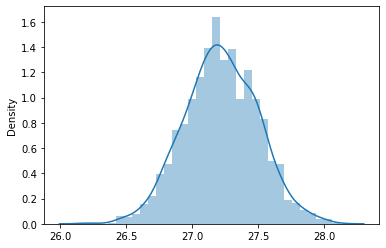

In [15]:
sb.distplot(sample_mean_list)

b)Is there any evidence that the players overall rating is greater than 80?

In [46]:
data.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [18]:
s = data['Overall_rating'].std() 
x_bar = data['Overall_rating'].mean()
n = len(data)
t = stats.t.isf((1-0.95)/2, df=n-1)

llimit = x_bar - t*s/n**0.5
ulimit = x_bar + t*s/n**0.5

print('confidence interval :', llimit,ulimit)

confidence interval : 78.06688808147831 78.35714018707293


c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [19]:
#two sample t test unpaired
#hypothesis formation 
#H0:preffered fool=potential
#Ha:preffered fool!=potential
#data is normal
left=data[data['Preferred Foot']=='Left']['Overall_rating']
right=data[data['Preferred Foot']=='Right']['Overall_rating']
print(stats.shapiro(left))
print(stats.shapiro(right))

stats.ttest_ind(left,right)

ShapiroResult(statistic=0.857197642326355, pvalue=4.3527381205882577e-20)
ShapiroResult(statistic=0.8516082167625427, pvalue=1.5380748084714233e-35)


Ttest_indResult(statistic=0.5491641016565159, pvalue=0.5829547938963882)

In [21]:


# Ho : independent
# Ha : dependent

sgll = 0.05
obs = pd.crosstab(data['Preferred Foot'],data['Potential'])
obs

Potential,75,76,77,78,79,80,81,82,83,84,...,86,87,88,89,90,91,92,93,94,95
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,57,41,40,31,34,51,32,29,30,32,...,17,16,9,13,6,1,4,0,2,0
Right,150,181,173,112,119,140,109,100,107,78,...,49,36,32,18,15,11,5,4,1,1


In [22]:
test_stat, pval, dof, exp = stats.chi2_contingency(obs)
stats.chi2_contingency(obs)

(29.456907942091373,
 0.07914467015823963,
 20,
 array([[ 48.27561837,  51.77385159,  49.67491166,  33.34982332,
          35.6819788 ,  44.54416961,  32.88339223,  30.08480565,
          31.95053004,  25.65371025,  22.15547703,  15.39222615,
          12.12720848,   9.56183746,   7.22968198,   4.8975265 ,
           2.79858657,   2.09893993,   0.93286219,   0.69964664,
           0.23321555],
        [158.72438163, 170.22614841, 163.32508834, 109.65017668,
         117.3180212 , 146.45583039, 108.11660777,  98.91519435,
         105.04946996,  84.34628975,  72.84452297,  50.60777385,
          39.87279152,  31.43816254,  23.77031802,  16.1024735 ,
           9.20141343,   6.90106007,   3.06713781,   2.30035336,
           0.76678445]]))

In [ ]:
#p>sig_val
#inf:there is no relation

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [48]:
#PEASRSON CORRELATION
data[['Overall_rating','Potential']].corr()

,Overall_rating,Potential
Overall_rating,1.000000,0.732086
Potential,0.732086,1.000000


In [50]:
#h0:correlation equal to 0
#ha:correlation not equal to 0
#data is normal
stats.pearsonr(data['Overall_rating'],data['Potential'])

(0.7320858358909942, 0.0)

In [51]:
#pval=0
#pval<sigval
#h0 is selected
#there is relation

e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [52]:
data.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [24]:

# Ho : independent 
# Ha : dependent

data[['Overall_rating','Skill Moves']].corr()

,Overall_rating,Skill Moves
Overall_rating,1.000000,0.083036
Skill Moves,0.083036,1.000000


In [54]:
#h0:correlation equal to 0
#ha:correlation not equal to 0
#data is normal
stats.pearsonr(data['Overall_rating'],data['Skill Moves'])

(0.08303643058332785, 0.00021570230856720446)

In [25]:
obs = pd.crosstab(data['Skill Moves'],data['Overall_rating'])


In [26]:
test_stat, pval, dof, exp = stats.chi2_contingency(obs)
stats.chi2_contingency(obs)

(262.7330450892917,
 1.6366088370930575e-23,
 72,
 array([[4.08036345e+01, 3.59575972e+01, 2.90762241e+01, 1.61857648e+01,
         1.63796063e+01, 1.36658253e+01, 9.01362948e+00, 9.11055023e+00,
         6.78445230e+00, 4.36143362e+00, 3.19838465e+00, 2.13225644e+00,
         1.25996971e+00, 1.64765270e+00, 1.06612822e+00, 4.84603735e-01,
         5.81524483e-01, 9.69207471e-02, 1.93841494e-01],
        [8.33074205e+01, 7.34134276e+01, 5.93639576e+01, 3.30459364e+01,
         3.34416961e+01, 2.79010601e+01, 1.84028269e+01, 1.86007067e+01,
         1.38515901e+01, 8.90459364e+00, 6.53003534e+00, 4.35335689e+00,
         2.57243816e+00, 3.36395760e+00, 2.17667845e+00, 9.89399293e-01,
         1.18727915e+00, 1.97879859e-01, 3.95759717e-01],
        [1.73840485e+02, 1.53194346e+02, 1.23876830e+02, 6.89581020e+01,
         6.97839475e+01, 5.82221100e+01, 3.84018173e+01, 3.88147400e+01,
         2.89045936e+01, 1.85815245e+01, 1.36264513e+01, 9.08430086e+00,
         5.36799596e+00, 7.0196

In [27]:
#pval=0
#pval<sigval
#h0 is selected
#there is relation

C:\Softwares\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall_rating', ylabel='Skill Moves'>

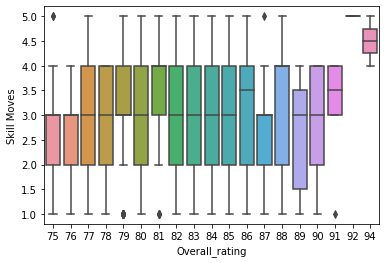

In [56]:
#graphical analysis

sb.boxplot(data['Overall_rating'],data['Skill Moves'])

2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

In [30]:
#importing datasets
df=pd.read_csv('phone.csv')
df.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [31]:
df_num=df.select_dtypes(include=np.number)

In [32]:
for i in df_num.columns:
    iqr=df_num[i].quantile(0.75)-df_num[i].quantile(0.25)
    ##print("inter_quartile_range is")
    upper_bound=df_num[i].quantile(0.75)+1.5*iqr
    lower_bound=df_num[i].quantile(0.25)-1.5*iqr
    ##print("ub is:",upper_bound)
    ##print("lb is:",lower_bound)
    print("the number of outliers in",i,"is",len(df_num[((df_num[i]>upper_bound) |(df_num[i]<lower_bound))]))

the number of outliers in duration is 3


In [33]:
for i in df_num.columns:
    iqr=df_num[i].quantile(0.75)-df_num[i].quantile(0.25)
    upper_bound=df_num[i].quantile(0.75)+1.5*iqr
    lower_bound=df_num[i].quantile(0.25)-1.5*iqr
    uc=df_num[i].quantile(0.99)
    lc=df_num[i].quantile(0.1)
    for j in df_num[i].index:
        if df_num.loc[j,i]>upper_bound:    ## use to remove outliers
            df_num.loc[j,i]=uc
        if df_num.loc[j,i]<lower_bound:
            df_num.loc[j,i]=lc

C:\Users\G Jaya Surya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-33-79f49078db83>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[j,i]=lc


C:\Users\G Jaya Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


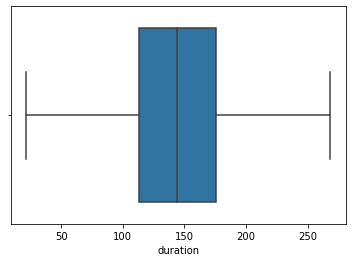

In [34]:
for i in df_num.columns:
    sb.boxplot(df_num[i])
    plt.show()

In [35]:
df.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [36]:
df['date']=pd.to_datetime(df['date'])
df.dtypes

date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

a)With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [44]:
x_bar = df['duration'].mean()
s = df['duration'].std()
n = len(data)
conf = 0.95


In [45]:
t = stats.t.isf((0.025), df=n-1)
llimit = x_bar - t*s/n**0.5
ulimit = x_bar + t*s/n**0.5

print('95% :', llimit,ulimit)

95% : 142.29180732714872 146.3180637925222


In [46]:
t = stats.t.isf((0.005), df=n-1)
llimit = x_bar - t*s/n**0.5
ulimit = x_bar + t*s/n**0.5

print('99% :', llimit,ulimit)

99% : 141.65830266191404 146.95156845775688


b) Perform statistical analysis to check whether the networks are equally distributed in the dataset

In [71]:
df['network'].value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [86]:
df.head()

,date,duration,item,month,network,network_type
0,2014-10-15 06:58:00,221.321120,data,2014-11,data,data
1,2014-10-15 06:58:00,81.610599,call,2014-11,Vodafone,mobile
2,2014-10-15 14:46:00,143.109111,call,2014-11,Meteor,mobile
3,2014-10-15 14:48:00,111.888670,call,2014-11,Tesco,mobile
4,2014-10-15 17:27:00,246.695171,call,2014-11,Tesco,mobile


c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

In [73]:
vod=df[df['network']=='Vodafone']['duration']
three=df[df['network']=='Three']['duration']
data=df[df['network']=='three']['duration']
Meteor=df[df['network']=='Meteor']['duration']
Tesco=df[df['network']=='Tesco']['duration']
landline=df[df['network']=='landline']['duration']
voicemail=df[df['network']=='voicemail']['duration']


C:\Softwares\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Softwares\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Softwares\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Softwares\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Softwares\lib\site-packag

<AxesSubplot:xlabel='duration', ylabel='Density'>

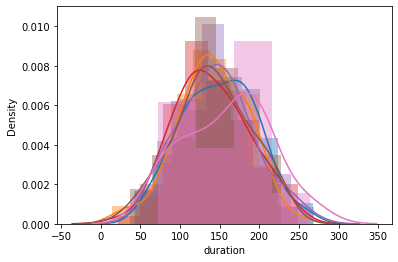

In [76]:
sb.distplot(vod)
sb.distplot(three)
sb.distplot(data)
sb.distplot(Meteor)
sb.distplot(Tesco)
sb.distplot(landline)
sb.distplot(voicemail)

In [ ]:
#inference:all the duration with respect networks are same .

d)Perform statistical tests to identify the relation between item and duration. Detailed 

In [77]:
df['item'].value_counts()

call    388
sms     282
data    150
Name: item, dtype: int64

In [78]:
call=df[df['item']=='call']['duration']
sms=df[df['item']=='sms']['duration']
data=df[df['item']=='data']['duration']

In [80]:
#to test the normality of data
print(stats.shapiro(call))
print(stats.shapiro(sms))
print(stats.shapiro(data))

ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708)
ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526)
ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596)


In [ ]:
#pvalue>0.05
#data is normal

In [ ]:
#test of equality of variance
#H0:all variance are equal
#Ha:atleast one variance is different

In [83]:
stats.levene(call,sms,data)

LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987)

In [ ]:
#pval=0.032
#sig_lvl=0.05
#all variance are equal
#data is normal
#have equal variance

In [81]:
stats.f_oneway(call,sms,data)

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

In [ ]:
#pval=0.14
#sig_val=0.05
#pval>sig_val
#H0 is selected
#the relationship between item and duration are same

e)Perform statistical tests to identify the relation between network and network_type. 


In [84]:
#Ho:network and network_type are independent
#Ha:network and network_type are dependent


obs=pd.crosstab(df['network'],df['network_type'])

In [85]:
test_stat,pval,dof,exp=stats.chi2_contingency(obs)
print("test_val:",test_stat)
print("pvalues is:",pval)
print("dof",dof)
print("expected:",exp)

test_val: 2460.0
pvalues is: 0.0
dof 18
expected: [[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]


In [ ]:
#pavl=0
#sig_val=0.05
#pval<sig_val
#ha is selected
#they are dependent